In [79]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
from koala.example_graphs import *
from matplotlib import pyplot as plt
from koala.pointsets import generate_random
from koala import plotting as pl
from koala.graph_color import color_lattice
from koala.flux_finder import fluxes_from_bonds, fluxes_to_labels
from koala.phase_space import k_hamiltonian_generator, analyse_hk, gap_over_phase_space
from numpy import linalg as la
from tqdm import tqdm

In [81]:
# define the lattice system
system_size = 14
points = generate_random(system_size)
lattice = generate_lattice(points)

# lattice = generate_hex_square_oct(2)
coloring = color_lattice(lattice)



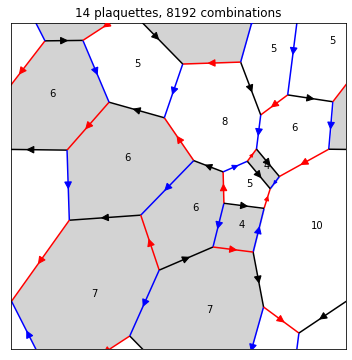

In [82]:
ujk = np.full(lattice.n_edges, 1)
fluxes = fluxes_from_bonds(lattice, ujk)
J = np.array([1,1,1])

# plot it
fig, ax = plt.subplots(figsize = (6,6))
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
pl.plot_edges(lattice, ax= ax,labels=coloring, directions=ujk)
pl.plot_plaquettes(lattice,labels = fluxes_to_labels(fluxes), color_scheme=np.array(['w','lightgrey']))
# pl.plot_edge_indices(lattice)
ax.set_title(f'{lattice.n_plaquettes} plaquettes, {2**(lattice.n_plaquettes -1)} combinations')

all_sides = np.array([lattice.plaquettes[n].n_sides for n in range(len(lattice.plaquettes))])
all_centers = np.array([lattice.plaquettes[n].center for n in range(len(lattice.plaquettes))])
for n in range(all_sides.__len__()):
    plt.text(all_centers[n,0], all_centers[n,1], all_sides[n])

(-0.7669472962569057, 3.599001454846553e-05)


Text(0.5, 1.0, 'min gap: 3.599e-05')

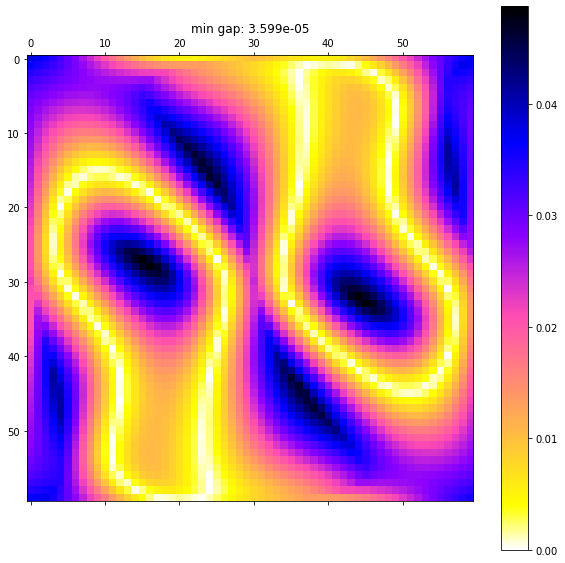

In [83]:
# plot an example band structure

resolution = 60
Hk = k_hamiltonian_generator(lattice, coloring,ujk,J)
print(analyse_hk(Hk, resolution))
g = gap_over_phase_space(Hk, resolution)

fig, ax = plt.subplots(figsize = (10,10))
cax = ax.matshow(g, cmap = 'gnuplot2_r',vmin = 0)
plt.colorbar(cax,ax=ax)
ax.set_title(f'min gap: {np.min(g):.3e}')

In [84]:
from koala.graph_utils import plaquette_spaning_tree
min_spanning_set = plaquette_spaning_tree(lattice)
n_in_tree =  len(min_spanning_set)



In [85]:
resolution = 50

str_format = '0' + str(n_in_tree) + 'b'
format(14, str_format)

def n_to_ujk(n, ujk, min_spanning_set):
    n_in_tree =  len(min_spanning_set)
    str_format = '0' + str(n_in_tree) + 'b'
    flips = np.array([int(x) for x in format(n, str_format)])
    ujk_flipped = ujk.copy()
    new_f_values = 1-2*flips
    ujk_flipped[min_spanning_set] = new_f_values
    return ujk_flipped

energies = []; gaps = []
for val in tqdm(range(2**n_in_tree)):
    # flips = np.array([int(x) for x in format(val, str_format)])
    # ujk_flipped = ujk.copy()
    # new_f_values = 1-2*flips
    # ujk_flipped[min_spanning_set] = new_f_values

    new_ujk = n_to_ujk(val, ujk, min_spanning_set)

    Hk = k_hamiltonian_generator(lattice, coloring,new_ujk,J)
    
    e, g = analyse_hk(Hk, resolution)
    energies.append(e)
    gaps.append(g)
    

100%|██████████| 8192/8192 [34:21<00:00,  3.97it/s]  


Text(0.5, 1.0, 'Gap Size')

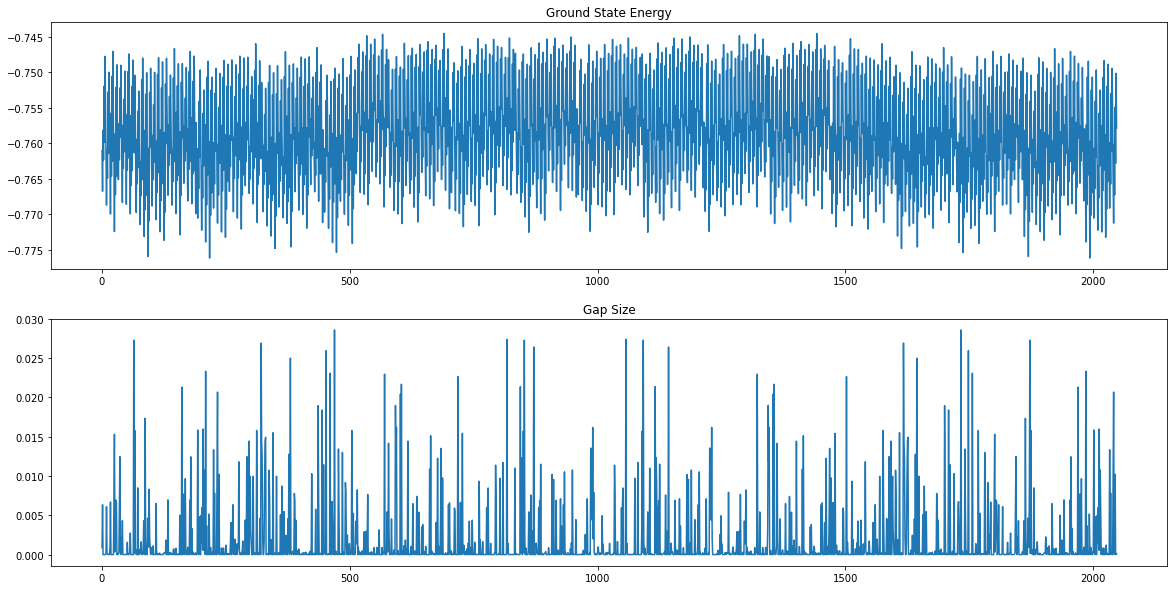

In [76]:
fig, ax = plt.subplots(2,1, figsize = (20,10))
ax[0].plot(energies)
ax[1].plot(gaps)
ax[0].set_title('Ground State Energy')
ax[1].set_title('Gap Size')

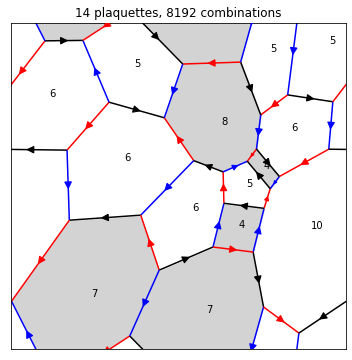

In [86]:
winner = np.argmin(energies)

ujk_winner = n_to_ujk(winner, ujk, min_spanning_set)
fluxes = fluxes_from_bonds(lattice, ujk_winner)
fig, ax = plt.subplots(figsize = (6,6))
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
pl.plot_edges(lattice, ax= ax,labels=coloring, directions=ujk_winner)
pl.plot_plaquettes(lattice,labels = fluxes_to_labels(fluxes), color_scheme=np.array(['w','lightgrey']))
# pl.plot_edge_indices(lattice)
ax.set_title(f'{lattice.n_plaquettes} plaquettes, {2**(lattice.n_plaquettes -1)} combinations')

all_sides = np.array([lattice.plaquettes[n].n_sides for n in range(len(lattice.plaquettes))])
all_centers = np.array([lattice.plaquettes[n].center for n in range(len(lattice.plaquettes))])
for n in range(all_sides.__len__()):
    plt.text(all_centers[n,0], all_centers[n,1], all_sides[n])



(-0.7820589340691844, 0.09137046932403678)


Text(0.5, 1.0, 'min gap: 9.137e-02')

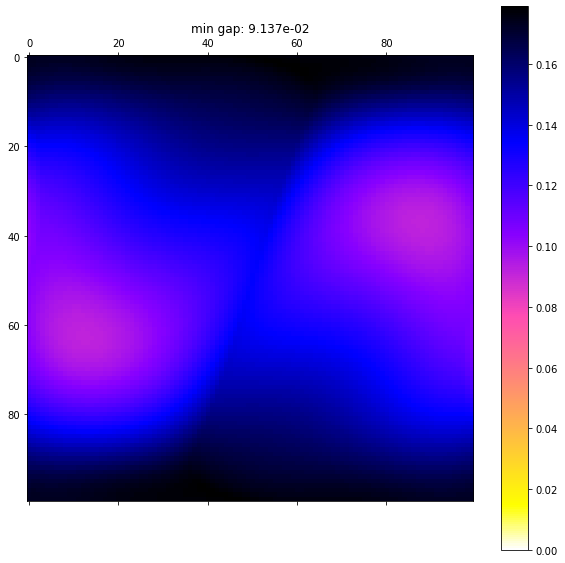

In [87]:
resolution = 100
Hk = k_hamiltonian_generator(lattice, coloring,ujk_winner,J)
print(analyse_hk(Hk, resolution))
g = gap_over_phase_space(Hk, resolution)

fig, ax = plt.subplots(figsize = (10,10))
cax = ax.matshow(g, cmap = 'gnuplot2_r',vmin = 0)
plt.colorbar(cax,ax=ax)
ax.set_title(f'min gap: {np.min(g):.3e}')